# DSC540 Project 2

DePaul University  
Ilyas Ustun, PhD  
Chicago, IL  

## Rules
- Do not change the code already present in the notebook.
- Write your code under the corresponding questions where you see `# Code here`. You are encouraged to use more than one cell.
- Provide explanation in a separate Markdown formatted cell. 
- You can change the cell type by:
    - Clicking on the outer area of the cell type you want to change,
    - Go to the top, and select either Code or Markdown from the dropdown menu.
- Be concise in your explanations and conclusions.
- Write clear code and provide explanation to functions you create by using `#` comment sign.
- For built-in function and methods you use from libraries, provide a very brief explanation of what they do.
- Try to answer the questions by yourself. Use documentation from pandas, sklearn and similar libraries to solve the problem.
- If you are stuck you can use different resources. Do not find an identical project and copy paste the solutions. 
- Write your name before beginning to code.


Important:  
- **Do NOT share the solutions with other people.**
- **Do NOT share the solutions on the internet including but not limited to Github and other platforms.**
- Sign the Honor Pledge below indicating that you have agreed to these rules listed here, and any other ethical and honor rules as required by the university.



- **Deliverables:**
    1. The Python Jupyter notebook file named properly with your name. Example: dsc540_project1_john_doe.ipynb
    2. The HTML output of this code notebook names the same way. Example: dsc540_project1_john_doe.html
        - File -> Download as -> HTML   
    
> **Do not ZIP the files.**

Good Luck!

### Yuliya Kizelbasheva

**Honor Pledge:**  
I pledge on my honor that I, **Yuliya Kizelbasheva**, have followed the rules listed above, that I have not given or received any unauthorized assistance on this assignment. 



## Project Description

For this project we will be exploring publicly available data from [LendingClub.com](www.lendingclub.com).  
Lending Club connects people who need money (borrowers) with people who have money (investors).   
Hopefully, as an investor you would want to invest in people who showed a profile of having a high probability of paying you back. We will try to create a model that will help predict this.

Check out more info on Lending Club on [Wikipedia](https://en.wikipedia.org/wiki/Lending_Club). Lending Club also had a [very interesting year in 2016](https://en.wikipedia.org/wiki/Lending_Club#2016).

This dataset is from before they went public.

We will use lending data from 2007-2010 and will try to classify and predict whether or not the borrower paid back their loan in full. You will analyze the data file provided. 

Here are what the columns represent:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).
* not.fully.paid: Whether the loan was paid back or not.

## Import Libraries

**Import the usual libraries for pandas and plotting, and sklearn.**

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
%config InlineBackend.figure_format ='retina'
RANDOM_STATE = 42

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics

In [4]:
import sklearn
sklearn.__version__

'1.0.2'

In [5]:
pd.set_option('display.max_columns', 100)

### These are the packages I used

In [6]:
# Your package imports here
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score, classification_report

# Q1
- Read in the dataset `loan_data.csv`
- How many rows and variables are there?
- What are the unique values of `not.fully.paid`?
- `not.fully.paid` having a value of 1 means that the person who took the loan did not fully pay it back. What's the proportion of those people in the full dataset?

## Get the Data

**Use pandas to read in the datasets as a dataframe.**

In [7]:
loans = pd.read_csv('loans.csv')

In [8]:
print("{} rows".format(loans.shape[0]))
print("{} variables".format(loans.shape[1]))
print("{} are the unique values of not.fully.paid: ".format(loans['not.fully.paid'].unique()))
print("{} is the proportion".format(loans['not.fully.paid'].sum()/loans.shape[0]))

2981 rows
14 variables
[0 1] are the unique values of not.fully.paid: 
0.4807111707480711 is the proportion


**Check out the info(), head(), and describe() methods on loans.**

In [9]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2981 entries, 0 to 2980
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      2981 non-null   int64  
 1   purpose            2981 non-null   object 
 2   int.rate           2981 non-null   float64
 3   installment        2981 non-null   float64
 4   log.annual.inc     2981 non-null   float64
 5   dti                2981 non-null   float64
 6   fico               2981 non-null   int64  
 7   days.with.cr.line  2981 non-null   float64
 8   revol.bal          2981 non-null   int64  
 9   revol.util         2981 non-null   float64
 10  inq.last.6mths     2981 non-null   int64  
 11  delinq.2yrs        2981 non-null   int64  
 12  pub.rec            2981 non-null   int64  
 13  not.fully.paid     2981 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 326.2+ KB


In [10]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1183,231.94,10.348846,5.69,712,2460.958333,6955,63.8,1,0,0,0
1,1,major_purchase,0.0774,124.88,11.264464,7.17,792,6360.041667,168,0.7,0,0,0,0
2,1,credit_card,0.1505,86.73,11.184421,16.30,667,3600.000000,16242,95.5,0,0,0,0
3,1,debt_consolidation,0.1284,403.42,10.736397,19.57,697,3450.041667,27261,87.4,1,0,0,0
4,1,debt_consolidation,0.1531,278.53,10.621327,8.20,662,1860.000000,7979,48.7,0,1,0,0


In [11]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,2981.000000,2981.000000,2981.000000,2981.000000,2981.000000,2981.000000,2981.000000,2.981000e+03,2981.000000,2981.000000,2981.000000,2981.000000,2981.000000
mean,0.748071,0.125977,326.020778,10.898762,12.794119,705.839316,4460.703008,1.826035e+04,48.442170,1.868165,0.171419,0.073465,0.480711
std,0.434193,0.026565,213.108504,0.650773,6.986455,37.073906,2486.531742,4.029009e+04,29.251287,2.567033,0.526928,0.271035,0.499712
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,180.041667,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.109600,165.630000,10.498250,7.170000,677.000000,2760.041667,2.979000e+03,24.700000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.125300,275.570000,10.915088,12.870000,702.000000,4043.000000,8.493000e+03,48.800000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.142600,457.050000,11.289782,18.350000,732.000000,5640.041667,1.853800e+04,72.500000,3.000000,0.000000,0.000000,1.000000
max,1.000000,0.216400,926.830000,14.124465,29.960000,817.000000,17616.000000,1.207359e+06,119.000000,33.000000,6.000000,3.000000,1.000000


# Q2
- Visual and Exploratory Analysis
- Carry out the tasks given below

## Exploratory Data Analysis

- Let's do some data visualization! 
- You can use many different visualization libraries inclusing matplotlib, seaborn, pandasand many more. Feel free to use whatever library you want. Don't worry about the colors matching, just worry about getting the main idea of the plot.

**Create a histogram of two FICO distributions on top of each other, one for each credit.policy outcome.**

*Note: You'll probably need one line of code for each histogram, I also recommend just using pandas built in .hist()*

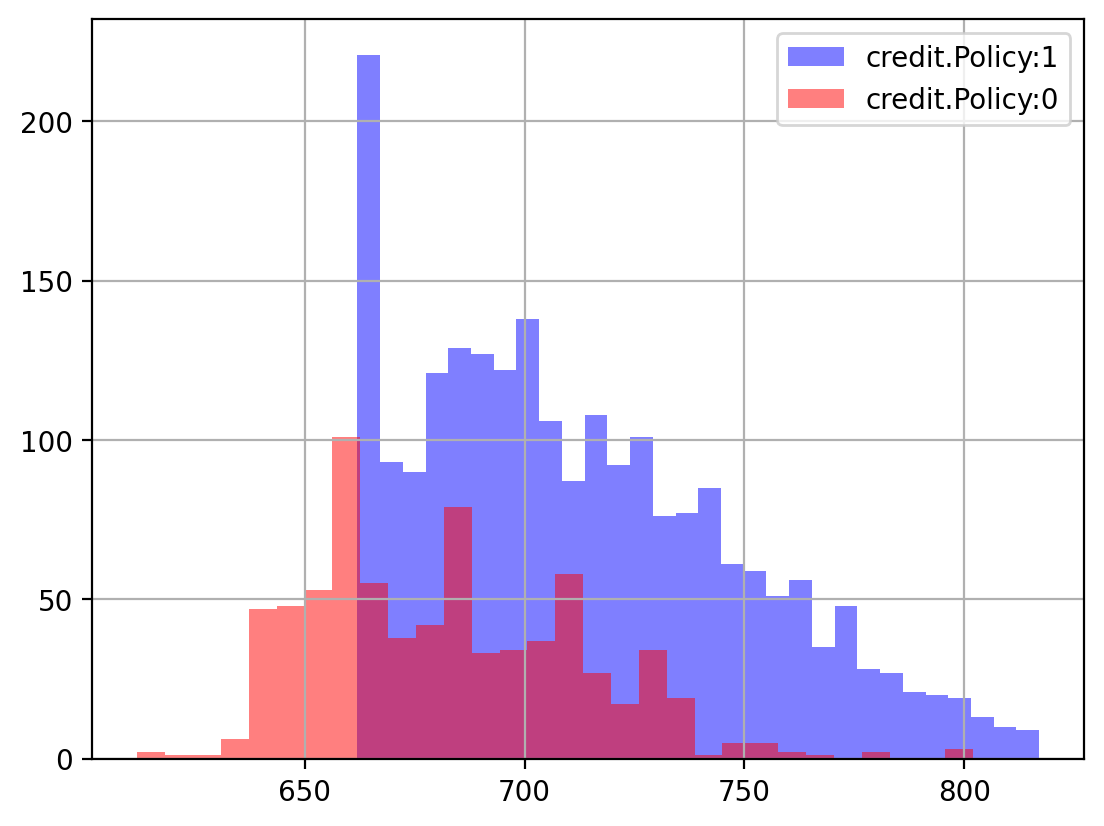

In [12]:
# creating 2 histograms on the same plot
cr0 = loans[loans['credit.policy'] == 0]
cr1 = loans[loans['credit.policy'] == 1]
plt.figure()

cr1['fico'].hist(bins=30, alpha=0.5, label='credit.Policy:1', color='blue')
cr0['fico'].hist(bins=30, alpha=0.5, label='credit.Policy:0', color='red')

plt.legend()
plt.show()

In [13]:
# Alternatively you can use seaborn library to create the same histogram (although due to bin creation, it might look different!)
import seaborn as sns

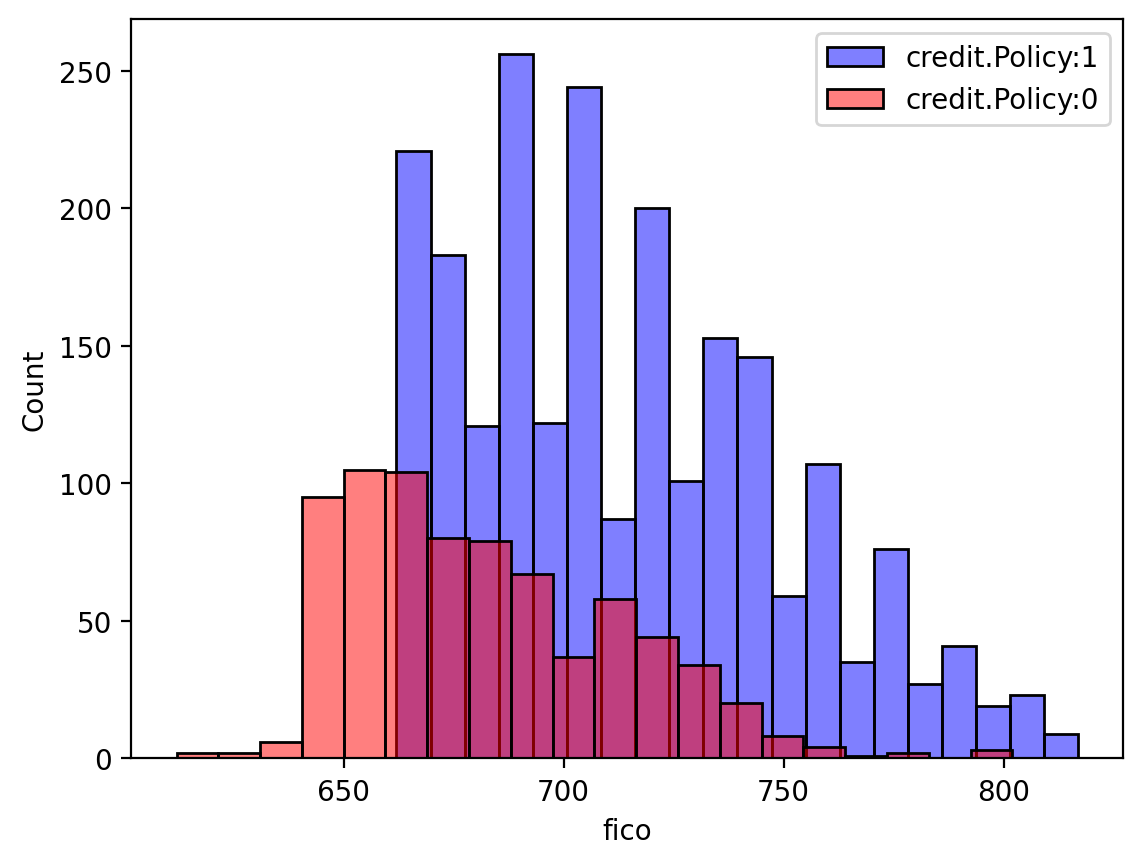

In [14]:
# creating 2 histograms on the same plot
plt.figure()

sns.histplot(data=cr1, x='fico', bins=20, color='blue', label='credit.Policy:1', alpha=0.5)
sns.histplot(data=cr0, x='fico', bins=20, color='red', label='credit.Policy:0', alpha=0.5)

plt.legend()
plt.show()

**Create another histogram for `not.fully.paid` column.**

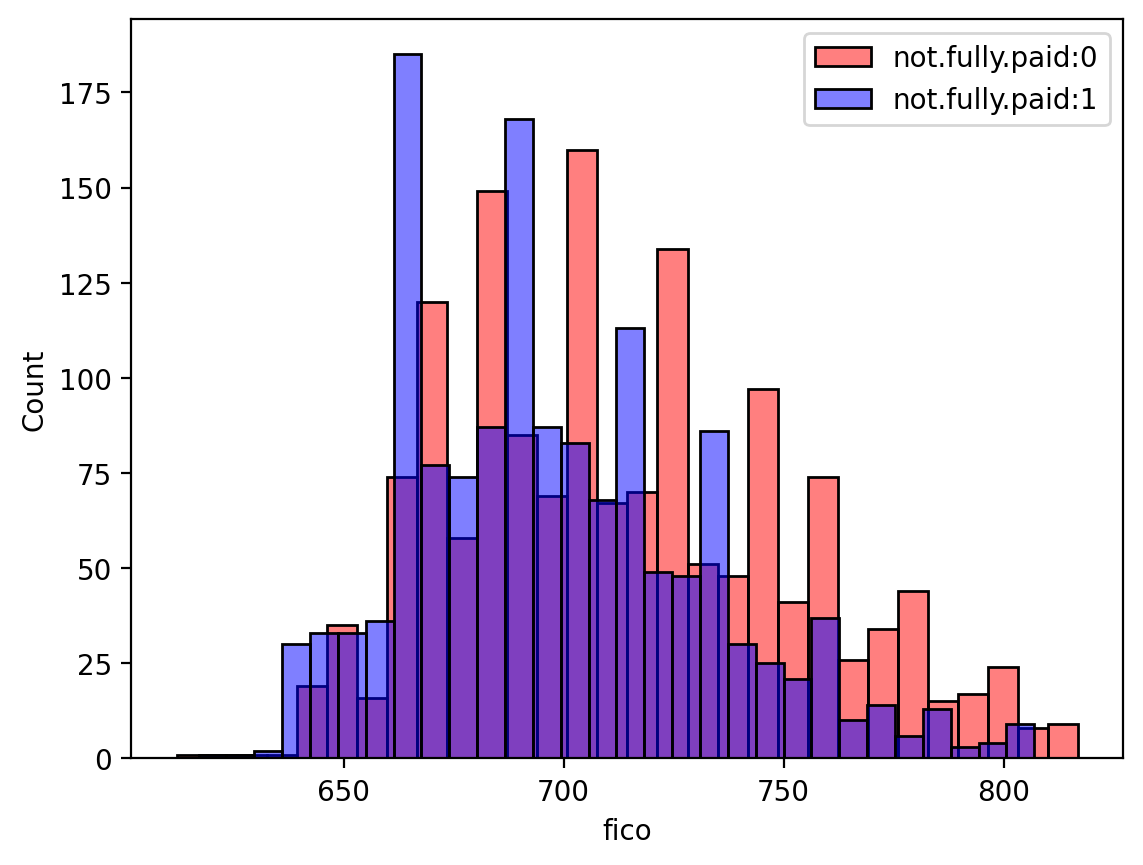

In [15]:
# creating 2 histograms on the same plot
nf0 = loans[loans['not.fully.paid'] == 0]
nf1 = loans[loans['not.fully.paid'] == 1]

plt.figure()

sns.histplot(data=nf0, x='fico', bins=30, alpha=0.5, color='red', label='not.fully.paid:0')
sns.histplot(data=nf1, x='fico', bins=30, alpha=0.5, color='blue', label='not.fully.paid:1')

plt.legend()
plt.show()

**Create a countplot (bar plot showing counts using seaborn) that shows the counts of loans by purpose, with the color hue defined by `not.fully.paid`**

<AxesSubplot:xlabel='purpose', ylabel='count'>

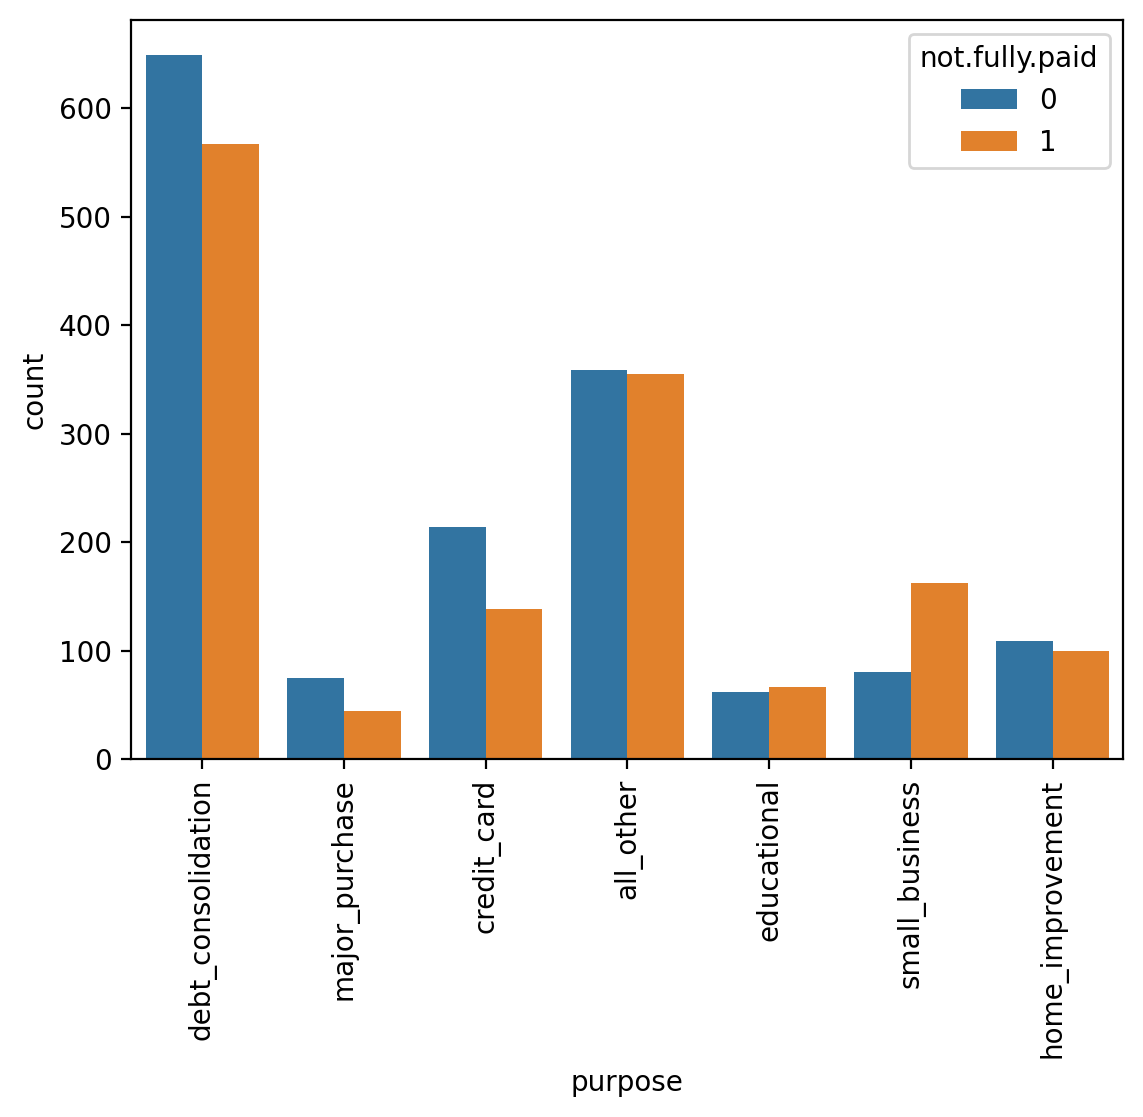

In [16]:
# creating a countplot
plt.subplots()
plt.xticks(rotation=90)
sns.countplot(x='purpose', hue='not.fully.paid', data=loans)

**Let's see the trend between FICO score and interest rate. Recreate the following jointplot.**

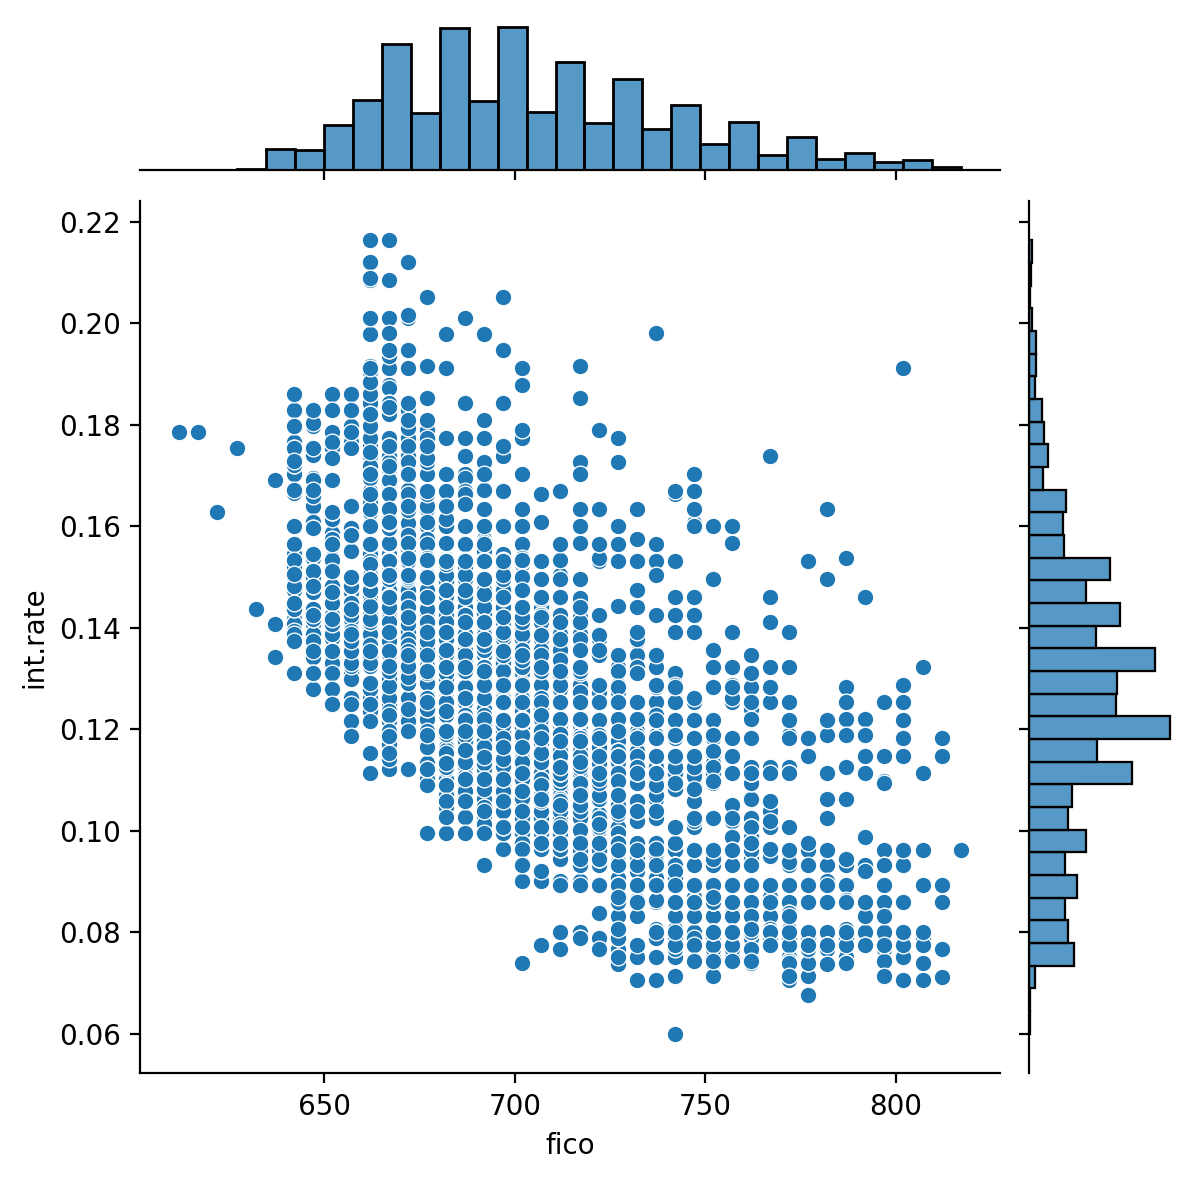

In [17]:
# creating a tredning plot
sns.jointplot(x='fico', y='int.rate', data=loans)

**Create the following lmplots to see if the trend differed between `not.fully.paid` and `int.rate`. Check the documentation for seaborn `lmplot()` if you can't figure out how to separate it into columns.**

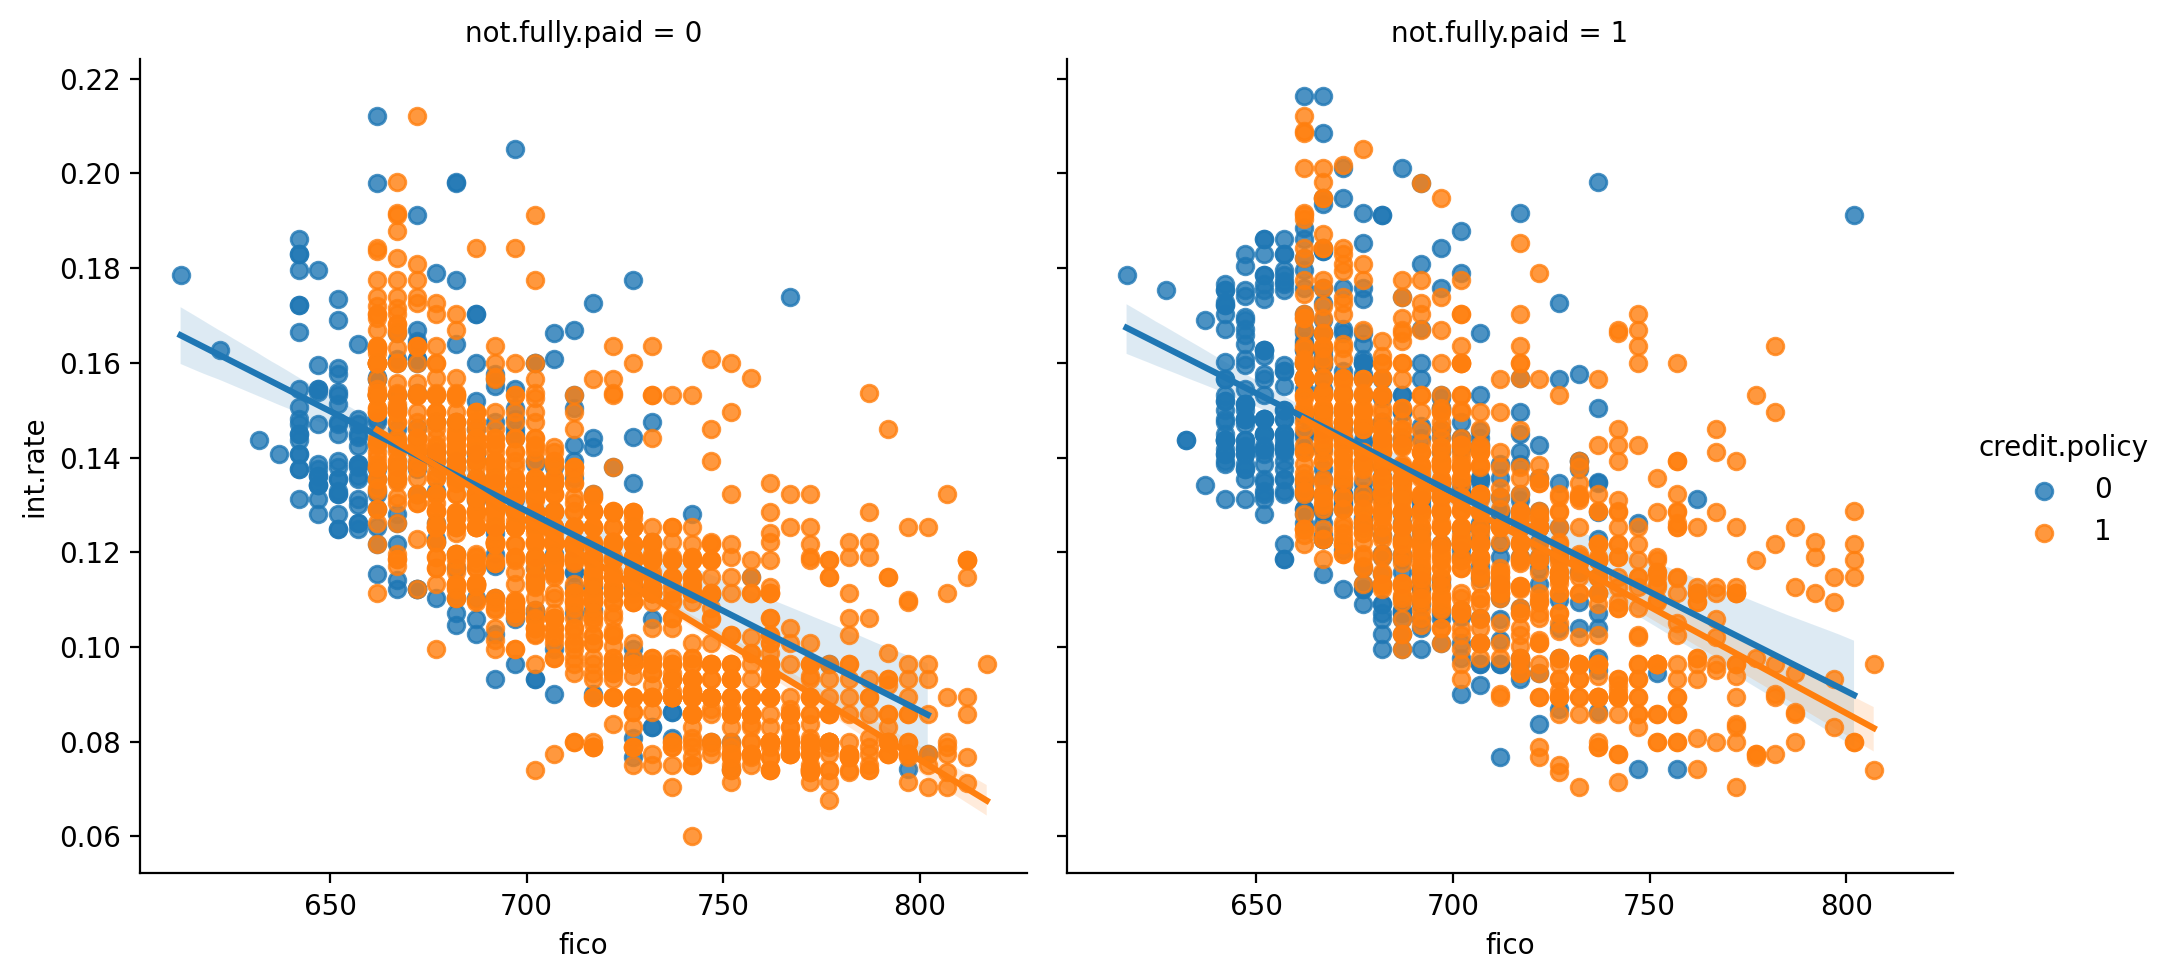

In [18]:
# creating lmplots for each unique value of not.fully.paid
sns.lmplot(data = loans, x='fico', y='int.rate', col='not.fully.paid', hue='credit.policy')

# Q3

## Setting up the Data

Let's get ready to set up our data for our models!

**This question has already been solved. You don't need to do anything. Just run the cells and continue.**

In [19]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2981 entries, 0 to 2980
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      2981 non-null   int64  
 1   purpose            2981 non-null   object 
 2   int.rate           2981 non-null   float64
 3   installment        2981 non-null   float64
 4   log.annual.inc     2981 non-null   float64
 5   dti                2981 non-null   float64
 6   fico               2981 non-null   int64  
 7   days.with.cr.line  2981 non-null   float64
 8   revol.bal          2981 non-null   int64  
 9   revol.util         2981 non-null   float64
 10  inq.last.6mths     2981 non-null   int64  
 11  delinq.2yrs        2981 non-null   int64  
 12  pub.rec            2981 non-null   int64  
 13  not.fully.paid     2981 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 326.2+ KB


## Categorical Features

Notice that the **purpose** column is of categorical type.

That means we need to transform them using dummy variables so sklearn will be able to understand them.   

Let's do this in one step using pd.get_dummies().


> The same transformation needs to be aplied on the test set as well. The easiest way would be to merge train and test sets, and to split after the transformation.

In [20]:
cat_feats = ['purpose']

In [21]:
loans = pd.get_dummies(loans, columns=cat_feats, drop_first=False)

In [22]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2981 entries, 0 to 2980
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               2981 non-null   int64  
 1   int.rate                    2981 non-null   float64
 2   installment                 2981 non-null   float64
 3   log.annual.inc              2981 non-null   float64
 4   dti                         2981 non-null   float64
 5   fico                        2981 non-null   int64  
 6   days.with.cr.line           2981 non-null   float64
 7   revol.bal                   2981 non-null   int64  
 8   revol.util                  2981 non-null   float64
 9   inq.last.6mths              2981 non-null   int64  
 10  delinq.2yrs                 2981 non-null   int64  
 11  pub.rec                     2981 non-null   int64  
 12  not.fully.paid              2981 non-null   int64  
 13  purpose_all_other           2981 

In [23]:
loans.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1183,231.94,10.348846,5.69,712,2460.958333,6955,63.8,1,0,0,0,0,0,1,0,0,0,0
1,1,0.0774,124.88,11.264464,7.17,792,6360.041667,168,0.7,0,0,0,0,0,0,0,0,0,1,0
2,1,0.1505,86.73,11.184421,16.30,667,3600.000000,16242,95.5,0,0,0,0,0,1,0,0,0,0,0
3,1,0.1284,403.42,10.736397,19.57,697,3450.041667,27261,87.4,1,0,0,0,0,0,1,0,0,0,0
4,1,0.1531,278.53,10.621327,8.20,662,1860.000000,7979,48.7,0,1,0,0,0,0,1,0,0,0,0


## Train Test Split

Now its time to split our data into a training set and a validation set!  

The `not.fully.paid` variable is the one that we will try to predict.

**Use sklearn to split your data into a training set and a testing set as we've done in the past.**

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
loans

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1183,231.94,10.348846,5.69,712,2460.958333,6955,63.8,1,0,0,0,0,0,1,0,0,0,0
1,1,0.0774,124.88,11.264464,7.17,792,6360.041667,168,0.7,0,0,0,0,0,0,0,0,0,1,0
2,1,0.1505,86.73,11.184421,16.30,667,3600.000000,16242,95.5,0,0,0,0,0,1,0,0,0,0,0
3,1,0.1284,403.42,10.736397,19.57,697,3450.041667,27261,87.4,1,0,0,0,0,0,1,0,0,0,0
4,1,0.1531,278.53,10.621327,8.20,662,1860.000000,7979,48.7,0,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2976,0,0.1797,364.99,10.762488,23.53,642,4252.041667,10226,63.9,1,1,0,0,0,0,1,0,0,0,0
2977,1,0.1316,202.63,11.156251,23.91,692,2130.000000,22713,43.1,1,0,0,0,0,0,1,0,0,0,0
2978,1,0.1148,263.75,10.491274,2.90,727,1800.000000,2980,31.7,1,0,0,0,0,0,1,0,0,0,0
2979,1,0.1442,859.57,12.611538,1.48,702,5279.958333,28367,66.5,2,1,0,0,0,0,0,0,1,0,0


In [26]:
X = loans.drop('not.fully.paid',axis=1)
y = loans['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=RANDOM_STATE)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.50, random_state=RANDOM_STATE)

<AxesSubplot:>

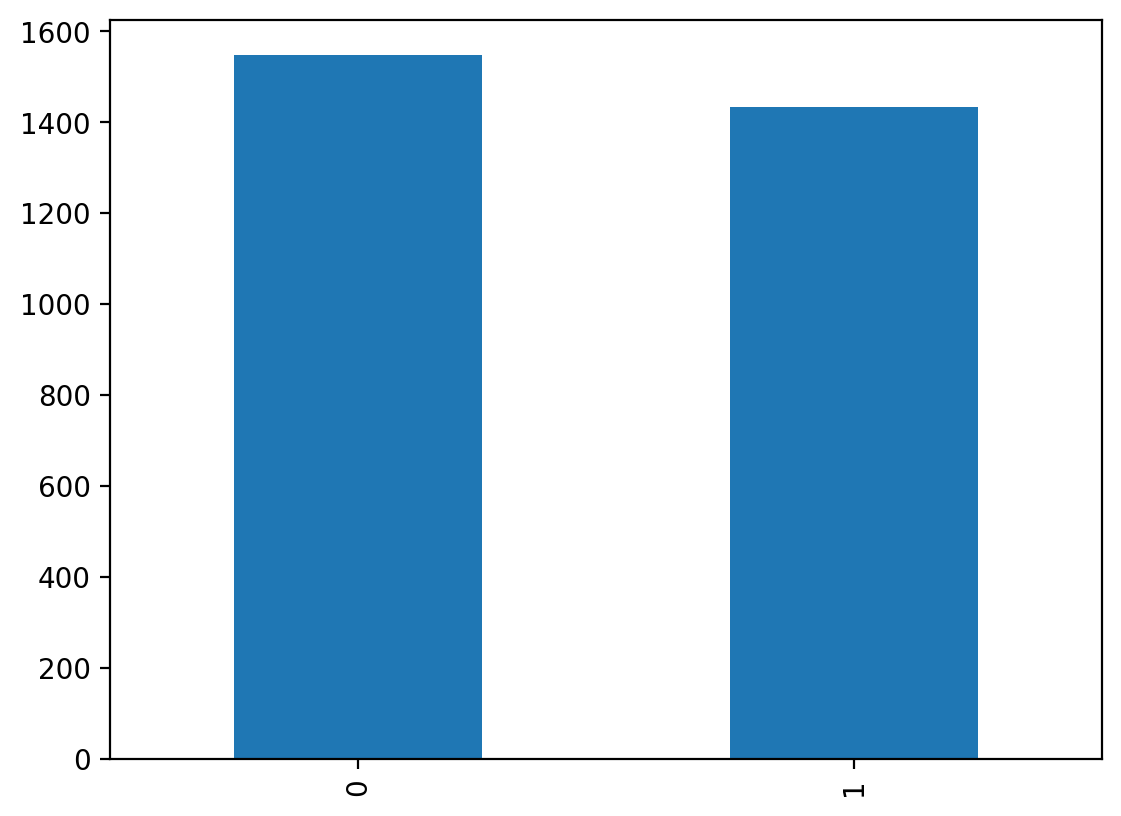

In [27]:
y.value_counts().plot(kind='bar')

<AxesSubplot:>

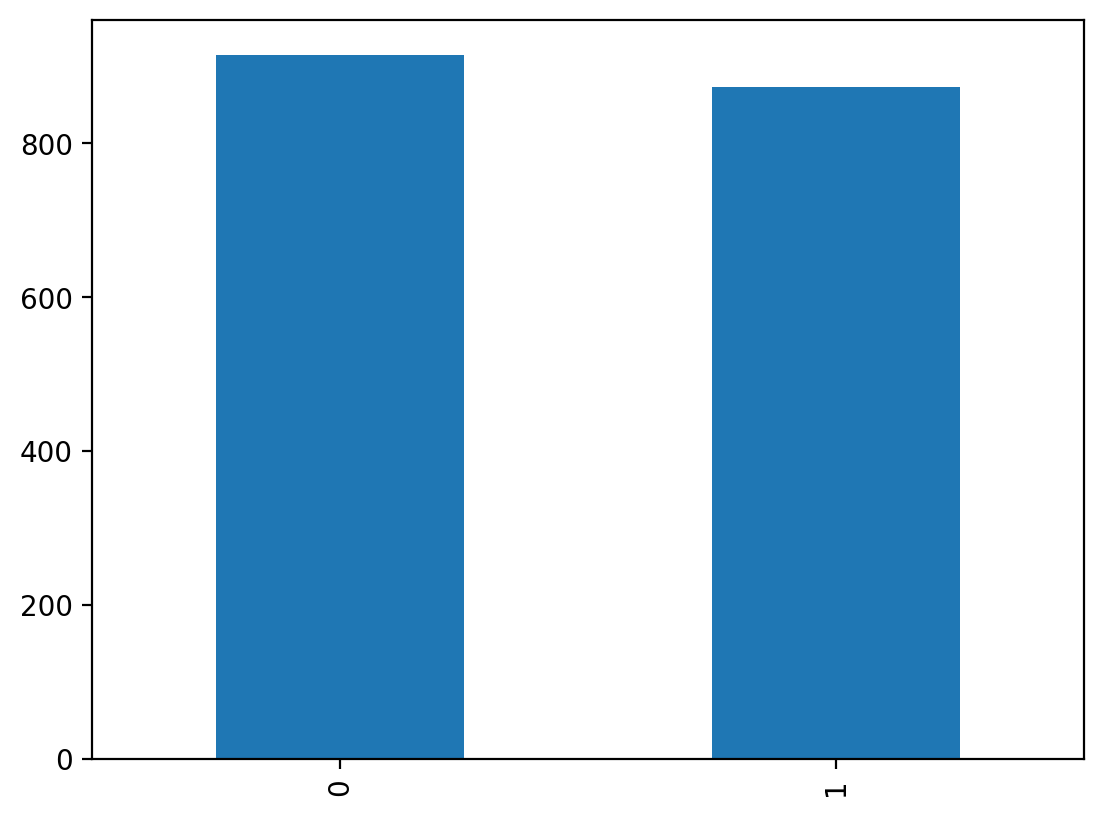

In [28]:
y_train.value_counts().plot(kind='bar')

<AxesSubplot:>

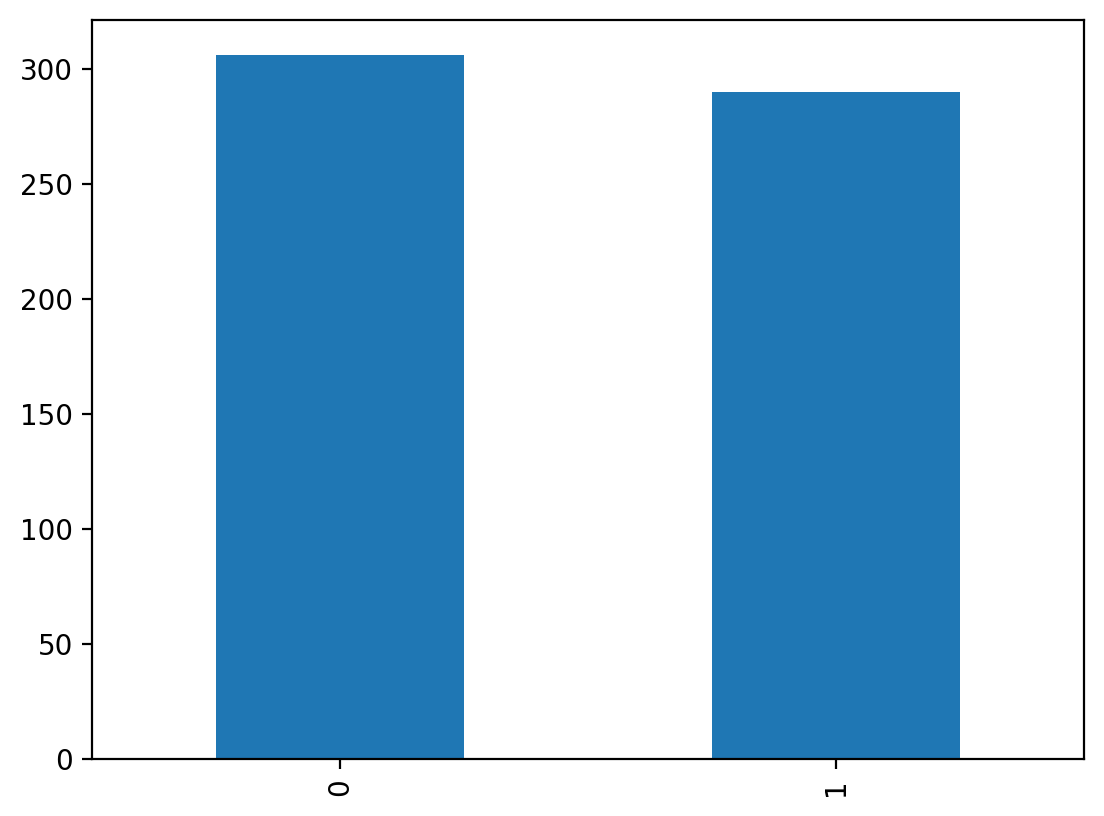

In [29]:
y_val.value_counts().plot(kind='bar')

> NOTE:

When asked to provide the performance metrics you can use the confusion matrix or the methods in `sklearn.metrics`.  
**Performance metrics** (at the very least):  
- Recall (Sensitivity)  
- Specificity  
- Precision  
- Balanced Accuracy  
- F1 Score  

Grid Search:
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html


# Q4

## Decision Tree Model

Let's start by training a single decision tree first!

1. Default decision tree:
    - Initiate the Decision Tree classifier from the sklearn library. Keep all parameters with their default values. (No need to specify anything)
    - Fit the model
    - Make predictions
    - Calculate accuracy score. What are the **training** and **validation** accuracies of the model?
    - Create confusion matrix
    - Provide the performance metrics for the **validation** set.


2. Using the training data perform hyper-parameter tuning. Use an appropriate metric for scoring (f1 is generally good).
    - Try several values for the `min_samples_split` hyper-parameter and apply cross validation (`GridSearchCV`) to find the best value.  
        - Using the best model provide the performance metrics for the validation set.
    - Try several values for the `max_depth` hyper-parameter and apply cross validation (`GridSearchCV`) to find the best value. 
        - Using the best model provide the performance metrics for the validation set.
    - Perform grid search (`GridSearchCV`) where you check for `min_samples_split` and `max_depth`.
        - Using the best model provide the performance metrics for the validation set.
        
        
3. Create a chart showing the feature importances based on the best model obtained.

In [30]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

Confusion Matrix :
 [[167 139]
 [119 171]]
Training Accuracy: 1.0
Validation Accuracy: 0.5671140939597316
Performance metrics:
               precision    recall  f1-score   support

           0       0.58      0.55      0.56       306
           1       0.55      0.59      0.57       290

    accuracy                           0.57       596
   macro avg       0.57      0.57      0.57       596
weighted avg       0.57      0.57      0.57       596

Best min_samples_split: 100
F1 min_samples_split: 0.5588235294117648
Best max_depth: 1000
F1 max_depth: 0.5695142378559465
Best min_samples_split and max_depth: {'max_depth': None, 'min_samples_split': 100}
F1 min_samples_split and max_depth: 0.5588235294117648


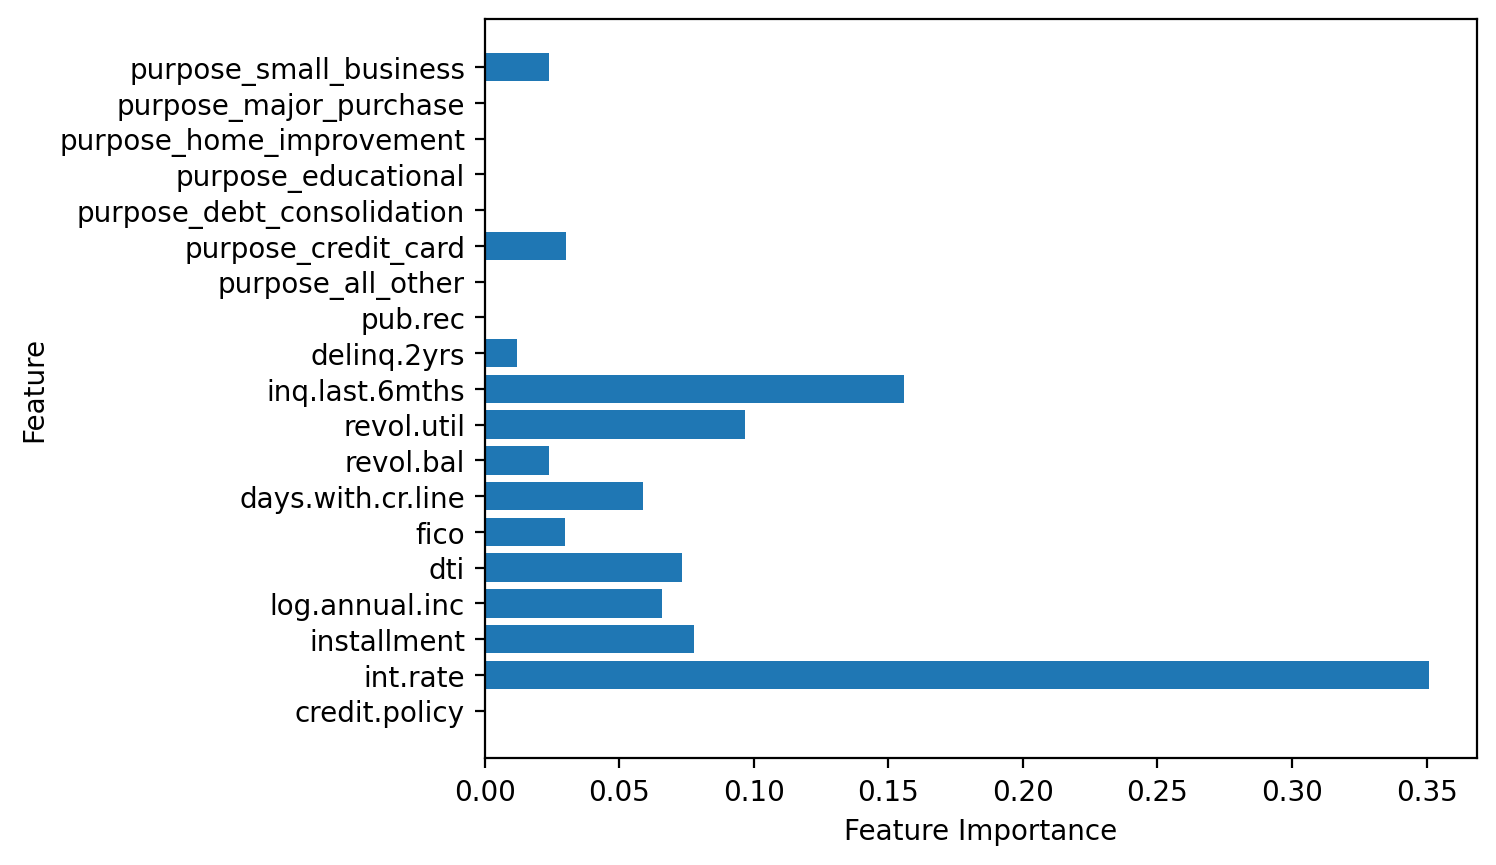

In [31]:
# Fit the model
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Make predictions
y_train_pred = clf.predict(X_train)
y_val_pred = clf.predict(X_val)

# Create confusion matrix
conf_matrix = confusion_matrix(y_val, y_val_pred)
print("Confusion Matrix :\n", conf_matrix)

# Calculate accuracy score.
train_acc = accuracy_score(y_train, y_train_pred)
val_acc = accuracy_score(y_val, y_val_pred)

print("Training Accuracy:", train_acc)
print("Validation Accuracy:", val_acc)

# Calculate metrics
print("Performance metrics:\n", classification_report(y_val, y_val_pred))

# Tuning min_samples_split
param = {'min_samples_split': [10, 100, 1000, 10000]}
gss = GridSearchCV(DecisionTreeClassifier(), param, scoring='f1', cv=5)
gss.fit(X_train, y_train)
bsm = gss.best_estimator_
y_val_s = bsm.predict(X_val)

print("Best min_samples_split:", gss.best_params_['min_samples_split'])
print("F1 min_samples_split:", f1_score(y_val, y_val_s))

# Tuning max_depth
params = {'max_depth': [10, 100, 1000, 10000]}
gsd = GridSearchCV(DecisionTreeClassifier(), params, scoring='f1', cv=5)
gsd.fit(X_train, y_train)
bsm = gsd.best_estimator_
y_val_d = bsm.predict(X_val)

print("Best max_depth:", gsd.best_params_['max_depth'])
print("F1 max_depth:", f1_score(y_val, y_val_d))

# Tuning min_samples_split and max_depth
paramss = {
    'min_samples_split': [10, 100, 1000, 10000], 'max_depth': [None, 10, 100, 1000, 10000] }
gs = GridSearchCV(DecisionTreeClassifier(), paramss, scoring='f1', cv=5)
gs.fit(X_train, y_train)
bm = gs.best_estimator_
y_val_b = bm.predict(X_val)

print("Best min_samples_split and max_depth:", gs.best_params_)
print("F1 min_samples_split and max_depth:", f1_score(y_val, y_val_b))

# Create feature importance plot
fi = bm.feature_importances_
features = X_train.columns
plt.barh(features, fi)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

# Q5

## Random Forest model

1. Default Random Forest Classifier:
    - Initiate the Random Forest Classifier from the sklearn library. Keep all parameters with their default values. (No need to specify anything)
    - Fit the model
    - Make predictions
    - Calculate accuracy score. What are the **training** and **validation** accuracies of the model?
    - Create confusion matrix
    - Provide the performance metrics for the **validation** set.
    
    
2. Using the training data perform hyper-parameter tuning. Use an appropriate metric for scoring (f1 is generally good).
    - Perform grid search (`GridSearchCV`) where you check for `min_samples_split`, `max_depth`, and `n_estimators`.
        - Using the best model provide the performance metrics for the validation set.
       
3. Create a chart showing the feature importances based on the best model obtained.

In [32]:
from sklearn.ensemble import RandomForestClassifier

Confusion Matrix :
 [[194 112]
 [117 173]]
Training Accuracy: 1.0
Validation Accuracy: 0.6157718120805369
Perofrmance metrics:
               precision    recall  f1-score   support

           0       0.62      0.63      0.63       306
           1       0.61      0.60      0.60       290

    accuracy                           0.62       596
   macro avg       0.62      0.62      0.62       596
weighted avg       0.62      0.62      0.62       596

Best params RF: {'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 10}
F1 Random Forest): 0.584938704028021


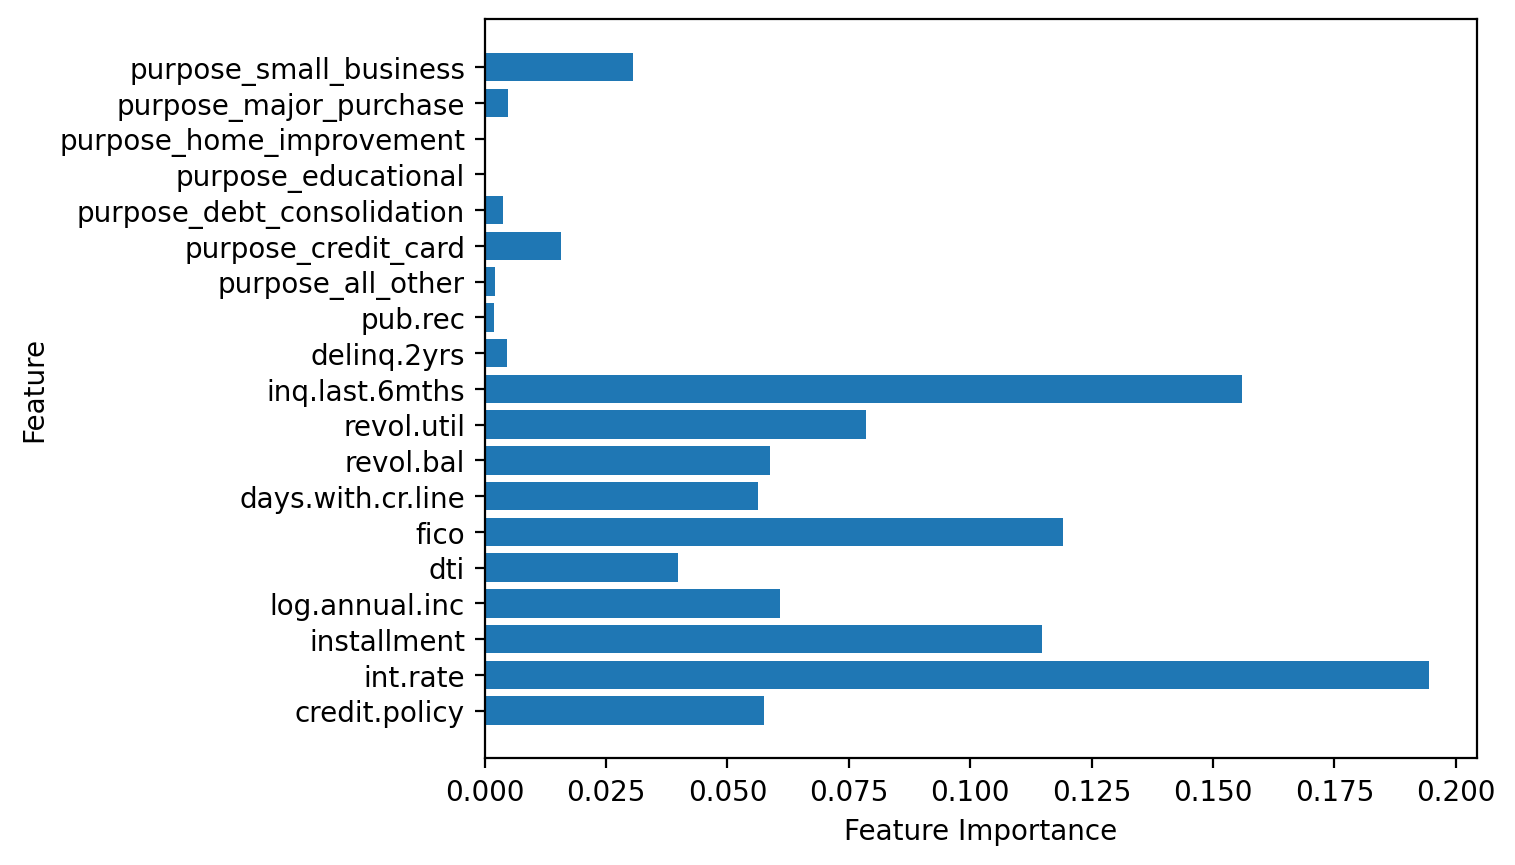

In [33]:
# Fit the model
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make predictions
y_train_pred = clf.predict(X_train)
y_val_pred = clf.predict(X_val)

# Create confusion matrix
conf_matrix = confusion_matrix(y_val, y_val_pred)
print("Confusion Matrix :\n", conf_matrix)

# Calculate accuracy score.
train_acc = accuracy_score(y_train, y_train_pred)
val_acc = accuracy_score(y_val, y_val_pred)

print("Training Accuracy:", train_acc)
print("Validation Accuracy:", val_acc)

# Calculate metrics
print("Perofrmance metrics:\n", classification_report(y_val, y_val_pred))

# Tuning Random Forest
params = {'n_estimators': [5,10,20], 'min_samples_split': [5,10,20], 'max_depth': [None,5,10,20]}

gs = GridSearchCV(RandomForestClassifier(), params, scoring='f1', cv=5)
gs.fit(X_train, y_train)
bm = gs.best_estimator_
y_val_rand_f = bm.predict(X_val)

print("Best params RF:", gs.best_params_)
print("F1 Random Forest):", f1_score(y_val, y_val_rand_f))

# Create feature importance plot
fi = bm.feature_importances_
features = X_train.columns
plt.barh(features, fi)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

# Q6

## Adaboost model

1. Default Adaboost classifier:
    - Initiate the Adaboost classifier from the sklearn library. Keep all parameters with their default values. (No need to specify anything)
    - Fit the model
    - Make predictions
    - Calculate accuracy score. What are the **training** and **validation** accuracies of the model?
    - Create confusion matrix
    - Provide the performance metrics for the **validation** set.
    
    
2. Using the training data perform hyper-parameter tuning. Use an appropriate metric for scoring (f1 is generally good).
    - Perform grid search (`GridSearchCV`) where you check for `learning_rate`, and `n_estimators`.
        - Using the best model provide the performance metrics for the validation set.
       
3. Create a chart showing the feature importances based on the best model obtained.

In [34]:
from sklearn.ensemble import AdaBoostClassifier

Confusion Matrix :
 [[177 129]
 [118 172]]
Training Accuracy: 0.6739373601789709
Validation Accuracy: 0.5855704697986577
Perofrmance metrics:
               precision    recall  f1-score   support

           0       0.60      0.58      0.59       306
           1       0.57      0.59      0.58       290

    accuracy                           0.59       596
   macro avg       0.59      0.59      0.59       596
weighted avg       0.59      0.59      0.59       596

Best params AB): {'learning_rate': 0.01, 'n_estimators': 20}
F1 AB): 0.6666666666666666


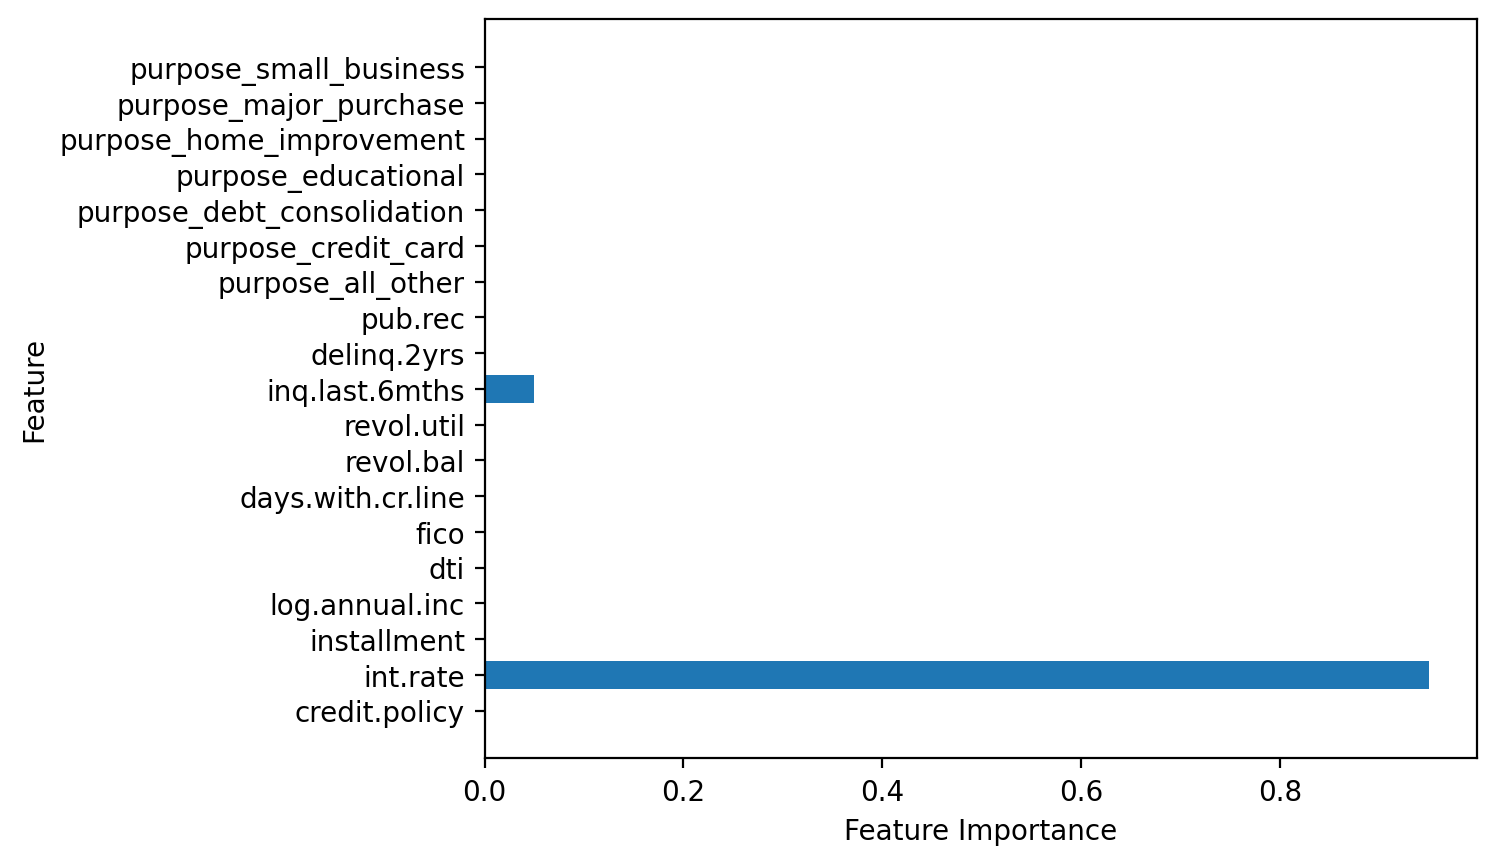

In [35]:
# Fit the model
clf = AdaBoostClassifier()
clf.fit(X_train, y_train)

# Make predictions
y_train_pred = clf.predict(X_train)
y_val_pred = clf.predict(X_val)

# Create confusion matrix
conf_matrix = confusion_matrix(y_val, y_val_pred)
print("Confusion Matrix :\n", conf_matrix)

# Calculate accuracy score.
train_acc = accuracy_score(y_train, y_train_pred)
val_acc = accuracy_score(y_val, y_val_pred)

print("Training Accuracy:", train_acc)
print("Validation Accuracy:", val_acc)

# Calculate metrics
print("Perofrmance metrics:\n", classification_report(y_val, y_val_pred))

# Tuning AdaBoost
params = {'n_estimators': [5,10,20], 'learning_rate': [0.01, 0.5, 1.0]}

gs = GridSearchCV(AdaBoostClassifier(), params, scoring='f1', cv=5)
gs.fit(X_train, y_train)
bm = gs.best_estimator_
y_val_rand_f = bm.predict(X_val)

print("Best params AB):", gs.best_params_)
print("F1 AB):", f1_score(y_val, y_val_rand_f))

# Create feature importance plot
fi = bm.feature_importances_
features = X_train.columns
plt.barh(features, fi)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

# Q7

## Gradient Boosting Machine

1. Default Gradient Boosting classifier:
    - Initiate the Gradient Boosting classifier from the sklearn library. Keep all parameters with their default values. (No need to specify anything)
    - Fit the model
    - Make predictions
    - Calculate accuracy score. What are the **training** and **validation** accuracies of the model?
    - Create confusion matrix
    - Provide the performance metrics for the **validation** set.
    
    
2. Using the training data perform hyper-parameter tuning. Use an appropriate metric for scoring (f1 is generally good).
    - Perform grid search (`GridSearchCV`) where you check for `learning_rate`, and `n_estimators`.
        - Using the best model provide the performance metrics for the validation set.
        
3. Create a chart showing the feature importances based on the best model obtained.

In [36]:
from sklearn.ensemble import GradientBoostingClassifier

Confusion Matrix :
 [[193 113]
 [120 170]]
Training Accuracy: 0.7986577181208053
Validation Accuracy: 0.6090604026845637
Perofrmance metrics:
               precision    recall  f1-score   support

           0       0.62      0.63      0.62       306
           1       0.60      0.59      0.59       290

    accuracy                           0.61       596
   macro avg       0.61      0.61      0.61       596
weighted avg       0.61      0.61      0.61       596

Best params : {'learning_rate': 1.0, 'n_estimators': 5}
F1: 0.6003552397868561


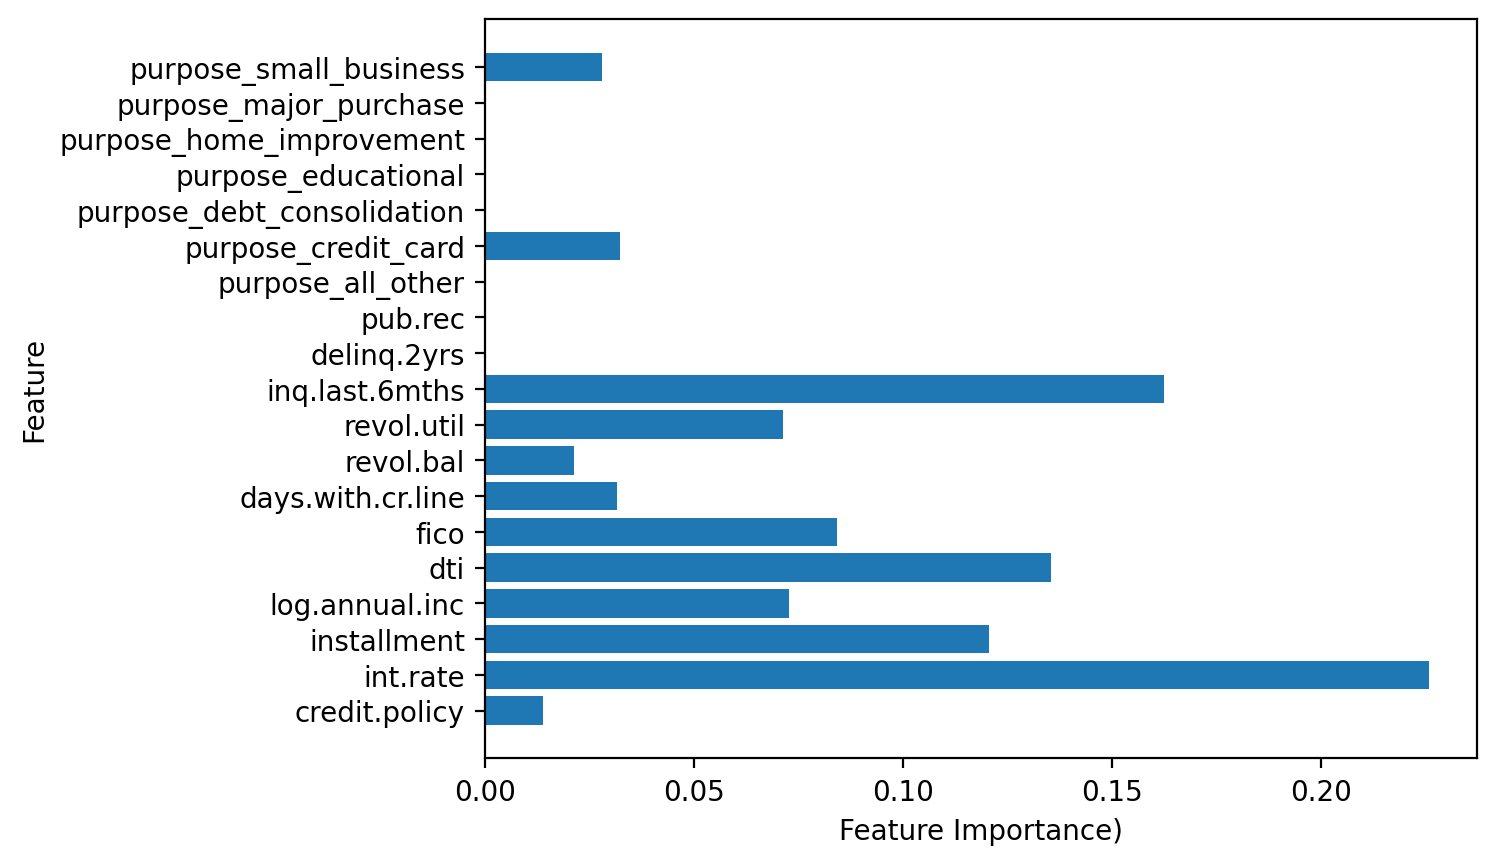

In [37]:
# Fit the model
clf = GradientBoostingClassifier()
clf.fit(X_train, y_train)

# Make predictions
y_train_pred = clf.predict(X_train)
y_val_pred = clf.predict(X_val)

# Create confusion matrix
conf_matrix = confusion_matrix(y_val, y_val_pred)
print("Confusion Matrix :\n", conf_matrix)

# Calculate accuracy score.
train_acc = accuracy_score(y_train, y_train_pred)
val_acc = accuracy_score(y_val, y_val_pred)

print("Training Accuracy:", train_acc)
print("Validation Accuracy:", val_acc)

# Calculate metrics
print("Perofrmance metrics:\n", classification_report(y_val, y_val_pred))

# Tuning Gradient Boosting
params = {'n_estimators': [5,10,20], 'learning_rate': [0.01, 0.5, 1.0]}

gs = GridSearchCV(GradientBoostingClassifier(), params, scoring='f1', cv=5)
gs.fit(X_train, y_train)
bm = gs.best_estimator_
y_val_rand_f = bm.predict(X_val)

print("Best params :", gs.best_params_)
print("F1:", f1_score(y_val, y_val_rand_f))

# Create feature importance plot
fi = bm.feature_importances_
features = X_train.columns
plt.barh(features, fi)
plt.xlabel('Feature Importance)')
plt.ylabel('Feature')
plt.show()

# Q8 (15 points)

- Using one or more of the Decision Tree, Random Forest, Adaboost, and Gradient Boosting classifer models:
    - Think of other ways of improving the recall and F1-score and list at least two possibilities.
    - Implement both of the methods you proposed. 
    - Is the model F1-score increasing?

In [38]:
# Fit the model
clf = RandomForestClassifier(n_estimators=1000, max_depth=100)
clf.fit(X_train, y_train)

# Make predictions
y_train_pred = clf.predict(X_train)
y_val_pred = clf.predict(X_val)

# Calculate recall and f1
recall_acc = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)

print('Original')
print("Recall:", recall_acc)
print("F1:", f1)
print('\n')

# Fit the model
clf = RandomForestClassifier(n_estimators=1000, max_depth=100)
clf.fit(X_train, y_train)

# Make predictions
y_train_pred = clf.predict(X_train)
y_val_pred = clf.predict(X_val)

# Calculate recall and f1
recall_acc = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)

print('First option')
print("Recall:", recall_acc)
print("F1:", f1)
print('\n')

# Fit the model
clf = RandomForestClassifier(n_estimators=100, max_depth=1)
clf.fit(X_train, y_train)

# Make predictions
y_train_pred = clf.predict(X_train)
y_val_pred = clf.predict(X_val)

# Calculate recall and f1
recall_acc = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)

print('Second option')
print("Recall:", recall_acc)
print("F1:", f1)


Original
Recall: 0.6137931034482759
F1: 0.6033898305084746


First option
Recall: 0.6068965517241379
F1: 0.5956006768189509


Second option
Recall: 0.4241379310344828
F1: 0.5157232704402516


According to the results from above, after tuning, the recall and F1 score did icreased in both options

# Q9 (15 points)

- Choose the best fitted model for each of the classifiers (1 model for each of Decision Tree, Random Forest, Adaboost, and Gradient Boosting)
- Create a table summarizing results on the **test set**:
    - Create confusion matrix for each model
    - Provide the performance metrics on the test set for each model.

Which one is the winner among all?

In [39]:
# Fit the model
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

# Make predictions
dt_pred = dt_classifier.predict(X_test)

# Create confusion matrix
conf_matrix_dt = confusion_matrix(y_test, dt_pred)

# Create performance metrics
c_dt = classification_report(y_test, dt_pred)

# Fit the model
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

# Make predictions
rf_pred = rf_classifier.predict(X_test)

# Create confusion matrix
conf_matrix_rf = confusion_matrix(y_test, rf_pred)

# Create performance metrics
c_rf = classification_report(y_test, rf_pred)

# Fit the model
ab_classifier = AdaBoostClassifier()
ab_classifier.fit(X_train, y_train)

# Make predictions
ab_pred = ab_classifier.predict(X_test)

# Create confusion matrix
conf_matrix_ab = confusion_matrix(y_test, ab_pred)

# Create performance metrics
c_ab = classification_report(y_test, ab_pred)

# Fit the model
gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(X_train, y_train)

# Make predictions
gb_pred = gb_classifier.predict(X_test)

# Create confusion matrix
conf_matrix_gb = confusion_matrix(y_test, gb_pred)

# Create performance metrics
c_gb = classification_report(y_test, gb_pred)

# Create a table
data = {'Model': ['DT', 'RF', 'AB', 'GB'],
        'CF': [conf_matrix_dt, conf_matrix_rf,conf_matrix_ab,conf_matrix_gb],
        'PM': [c_dt, c_rf,c_ab,c_gb]}

df = pd.DataFrame(data)

df.to_csv('my_data_table_output.csv', index=False)  # Specify the file name and set index to False if you don't want to 

print(df)

  Model                        CF  \
0    DT  [[185, 142], [121, 149]]   
1    RF  [[201, 126], [125, 145]]   
2    AB  [[198, 129], [111, 159]]   
3    GB  [[214, 113], [122, 148]]   

                                                  PM  
0                precision    recall  f1-score   ...  
1                precision    recall  f1-score   ...  
2                precision    recall  f1-score   ...  
3                precision    recall  f1-score   ...  


According to the output table, Random Forest had the highest performance metrics than other classifiers

# Great Job!